# Dosya Okuma

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# Keşifsel Veri Analizi

In [ ]:
df.shape


(10000, 14)

In [ ]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [ ]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [ ]:
df["Machine failure"].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [ ]:
lmh=df["Type"].value_counts()

In [ ]:
df_model = pd.get_dummies(df, columns = ["Type"], prefix = ["Type"])
df_model

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1
1,2,L47181,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0
2,3,L47182,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1,0
3,4,L47183,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1,0
4,5,L47184,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,0,0,1
9996,9997,H39410,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,1,0,0
9997,9998,M24857,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,0,0,1
9998,9999,H39412,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,1,0,0


In [ ]:
df["Product ID"].value_counts()

L57064    1
L56553    1
L47380    1
L56199    1
M16639    1
         ..
M23167    1
M23686    1
L54248    1
L56616    1
L54873    1
Name: Product ID, Length: 10000, dtype: int64

In [ ]:
df["UDI"].value_counts()

2047    1
5424    1
1338    1
7481    1
5432    1
       ..
2716    1
8857    1
4759    1
6806    1
2049    1
Name: UDI, Length: 10000, dtype: int64

In [ ]:
sum(df.duplicated())

0

# GRAFİKLER

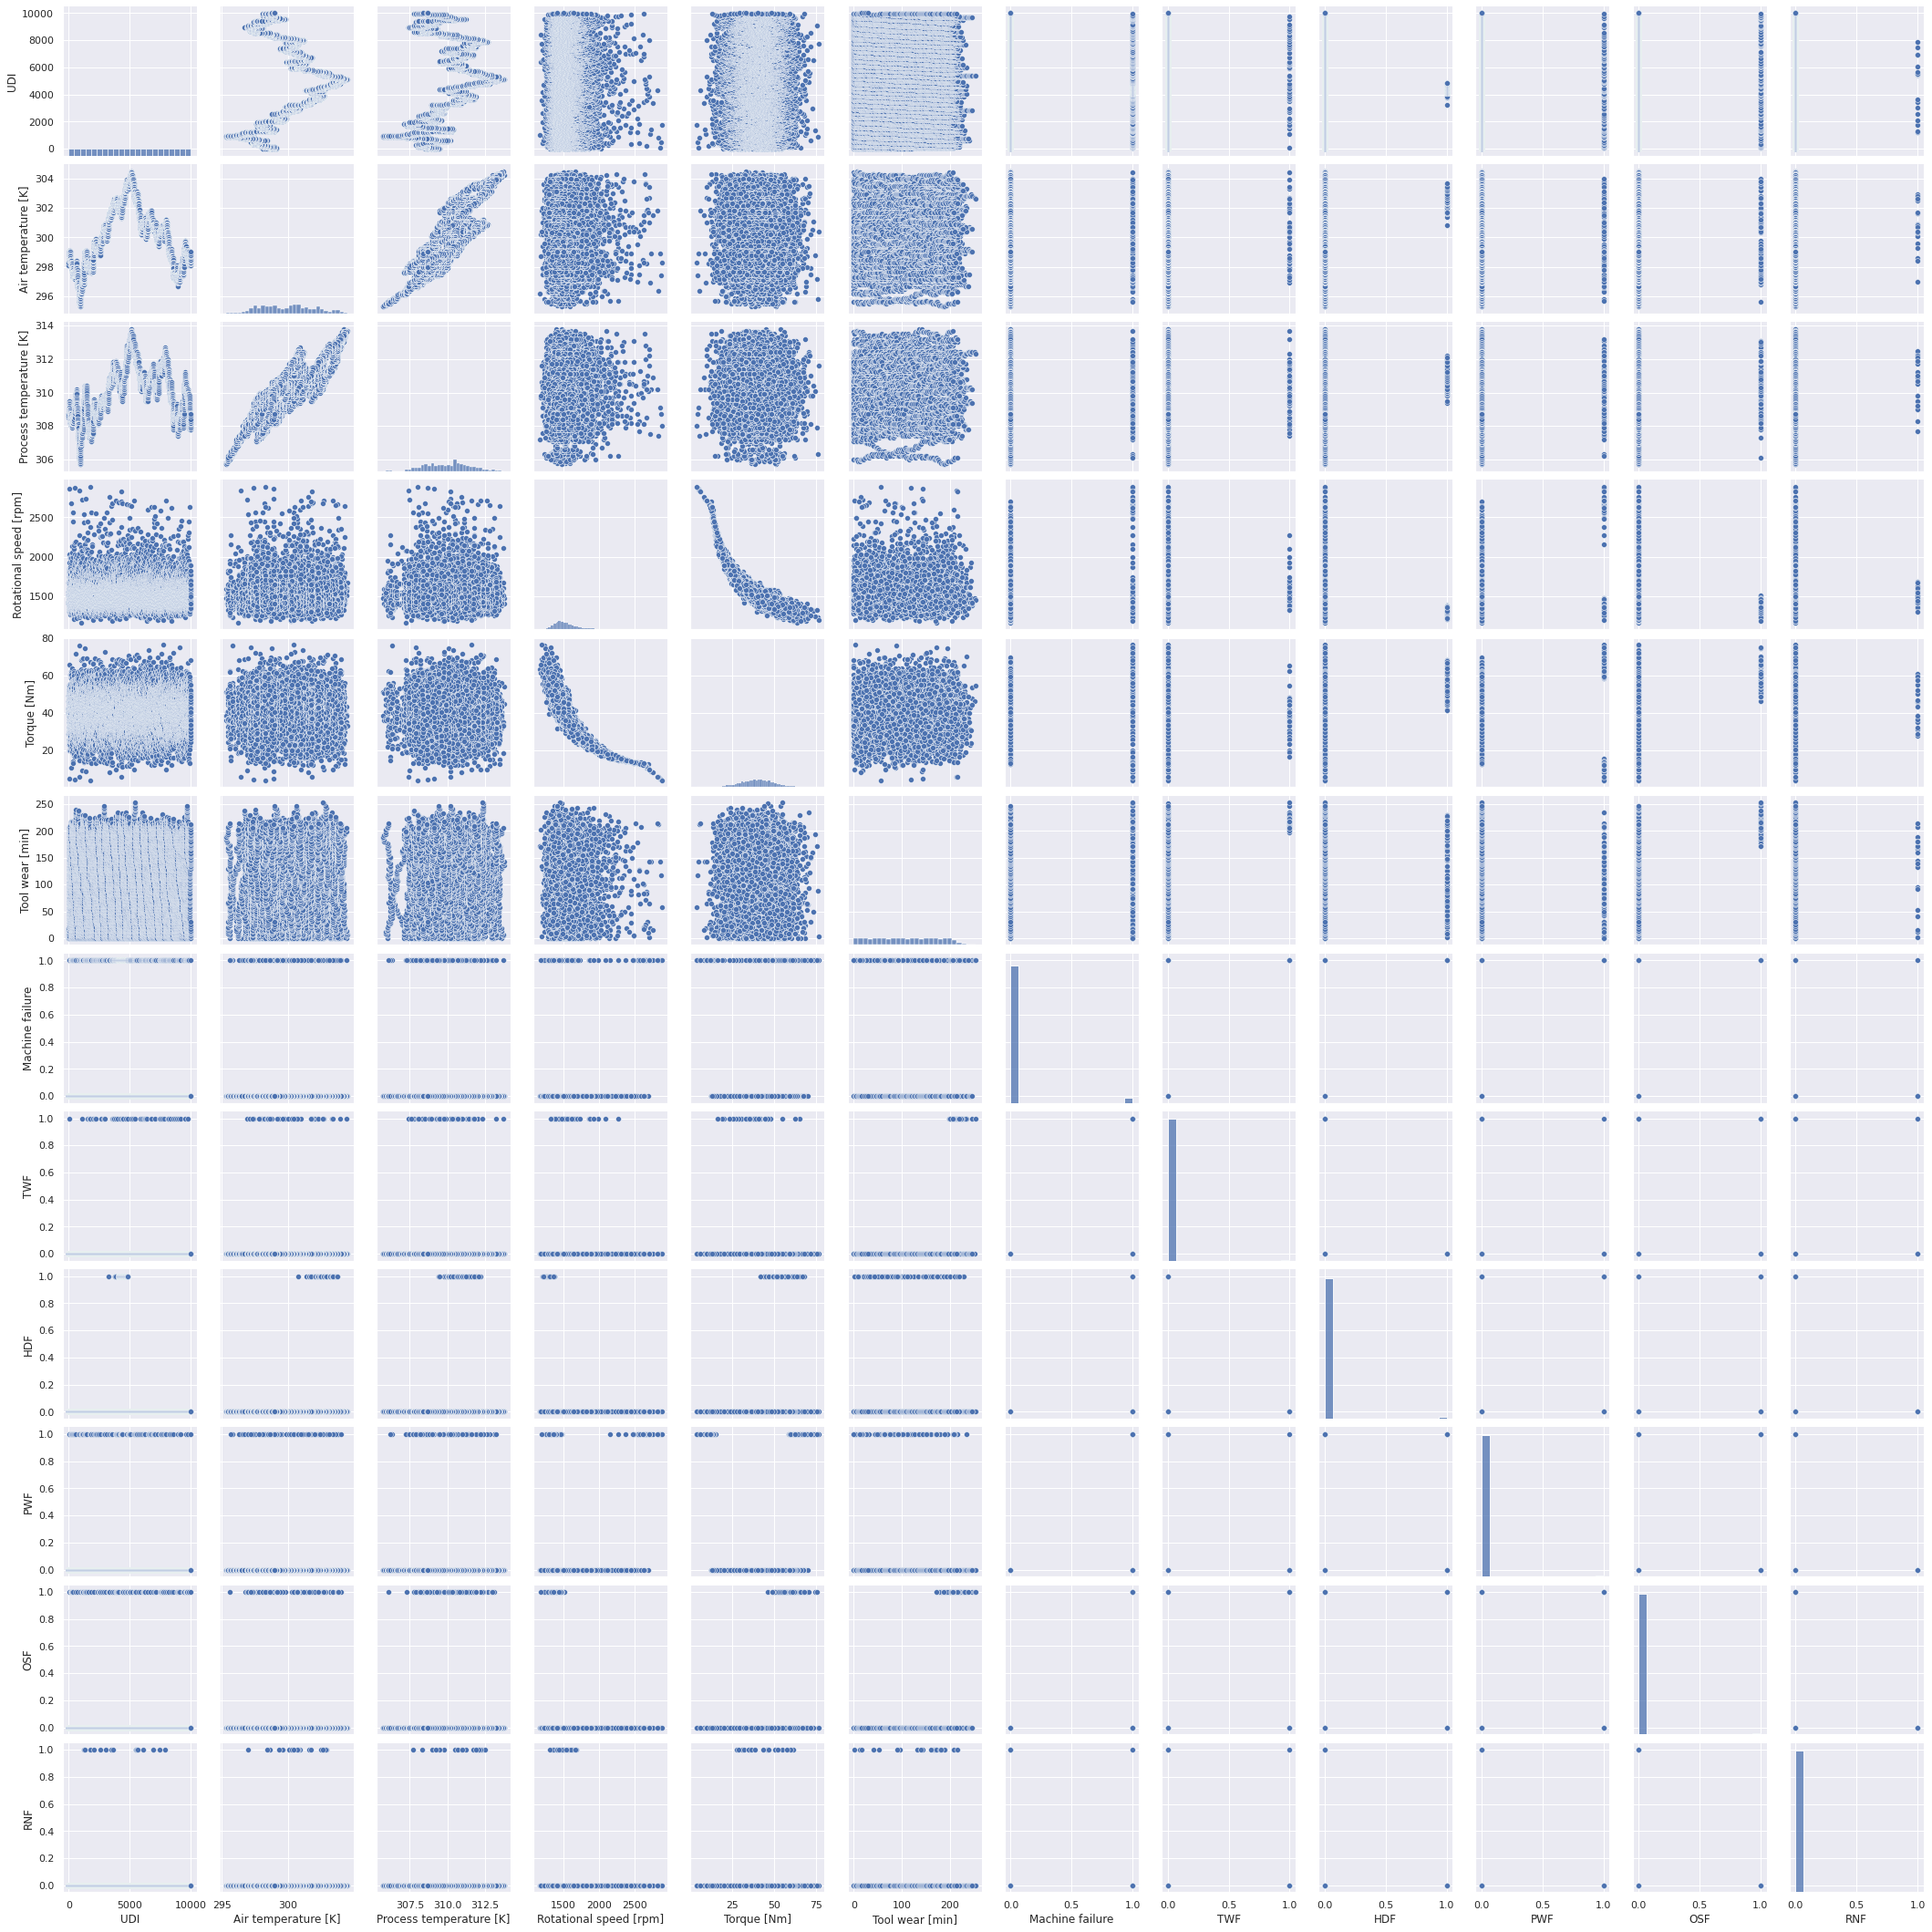

In [ ]:
sns.pairplot(df)

## Hata tiplerine Göre Analiz

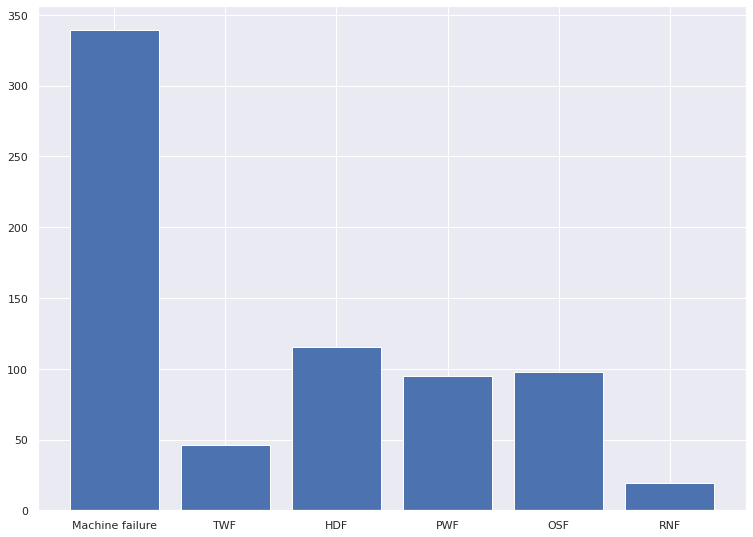

In [ ]:
errorcols=["Machine failure","TWF","HDF","PWF","OSF","RNF"]
errordic={}
for hata in df[errorcols]:
    l=len(df[hata].loc[df[hata]==1])
    errordic[hata]=l
plt.bar(*zip(*errordic.items()))
plt.show()

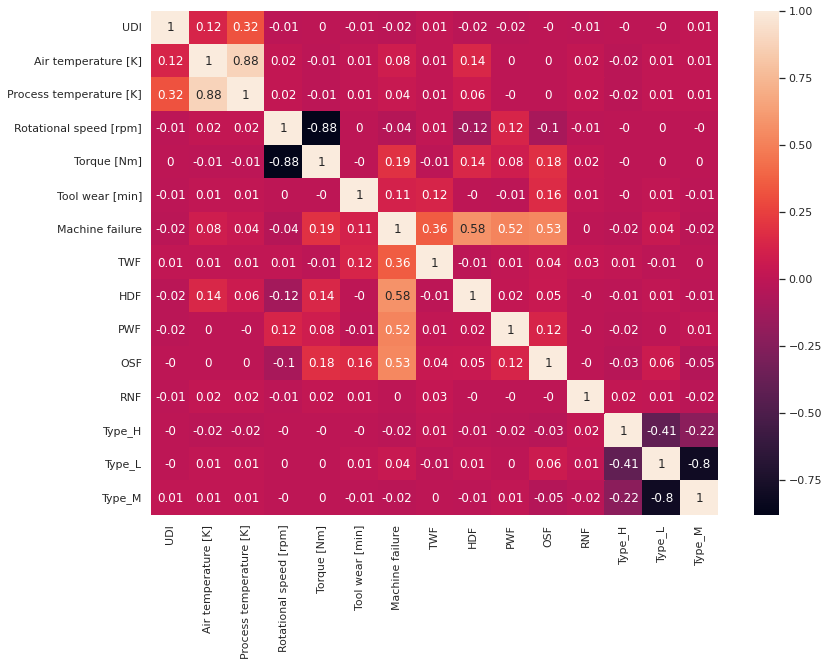

In [ ]:
sns.set(rc={'figure.figsize':(12.7,9.27)})

correlation_matrix = df_model.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Ayrık Veri Analizi

In [ ]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

IQR=Q3-Q1
low= Q1 - (1.5*IQR)
up= Q3+ (1.5*IQR)

print(low)
print(up)

UDI                       -4998.50
Air temperature [K]         293.50
Process temperature [K]     305.35
Rotational speed [rpm]     1139.50
Torque [Nm]                  12.80
Tool wear [min]            -110.50
Machine failure               0.00
TWF                           0.00
HDF                           0.00
PWF                           0.00
OSF                           0.00
RNF                           0.00
dtype: float64
UDI                        14999.50
Air temperature [K]          306.30
Process temperature [K]      314.55
Rotational speed [rpm]      1895.50
Torque [Nm]                   67.20
Tool wear [min]              325.50
Machine failure                0.00
TWF                            0.00
HDF                            0.00
PWF                            0.00
OSF                            0.00
RNF                            0.00
dtype: float64


In [ ]:
collist = df.columns.to_list()
collist = collist[3:8]
print(collist)

['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


> Ayrık veri kontrolü ve liste ataması

In [ ]:
unclean=[]          
for i in collist:
    if  not ( df[i][(df[i] < low[i])].empty ):
        unclean.append(i)
    elif not ( df[i][(df[i] > up[i])].empty ):
        unclean.append(i)
    else:
        pass
print(unclean)        

['Rotational speed [rpm]', 'Torque [Nm]']


**Outliers Miktarlarının bulunması**

In [ ]:
Ol={}
for i in unclean:
    lowıqr = (df[i][(df[i] < low[i])].count())
    upıqr = ( df[i][(df[i] > up[i])].count() )
    totaloutlier=lowıqr+upıqr
    Ol[i]=totaloutlier
Ol

{'Rotational speed [rpm]': 418, 'Torque [Nm]': 69}

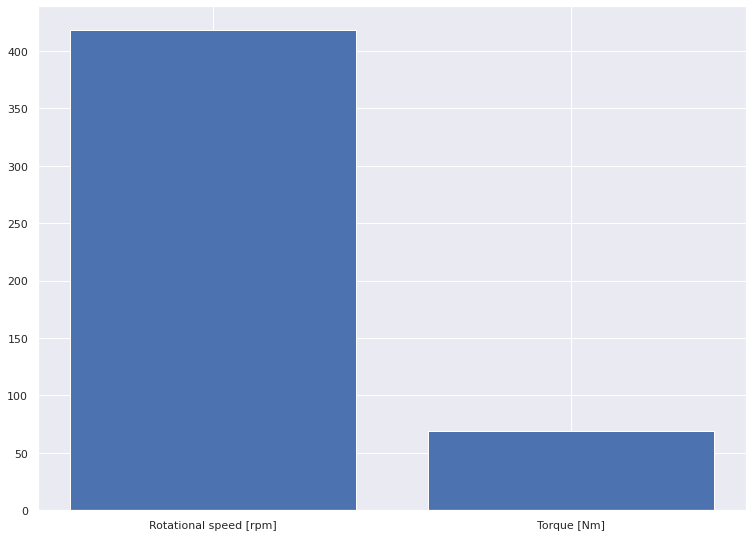

In [ ]:
plt.bar(*zip(*Ol.items()))
plt.show()

------------------

In [ ]:
df_model = df_model.drop(["Product ID", "UDI","Machine failure"], axis = 1)
df_model

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,0,1
9996,298.9,308.4,1632,31.8,17,0,0,0,0,0,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,0,1
9998,299.0,308.7,1408,48.5,25,0,0,0,0,0,1,0,0


In [ ]:
new_column_order=["Type_H","Type_L","Type_M","Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Tool wear [min]",
                  "Torque [Nm]","TWF","HDF","PWF","OSF","RNF"]
df_model=df_model[new_column_order]
df_model

,Type_H,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Tool wear [min],Torque [Nm],TWF,HDF,PWF,OSF,RNF
0,0,0,1,298.1,308.6,1551,0,42.8,0,0,0,0,0
1,0,1,0,298.2,308.7,1408,3,46.3,0,0,0,0,0
2,0,1,0,298.1,308.5,1498,5,49.4,0,0,0,0,0
3,0,1,0,298.2,308.6,1433,7,39.5,0,0,0,0,0
4,0,1,0,298.2,308.7,1408,9,40.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,298.8,308.4,1604,14,29.5,0,0,0,0,0
9996,1,0,0,298.9,308.4,1632,17,31.8,0,0,0,0,0
9997,0,0,1,299.0,308.6,1645,22,33.4,0,0,0,0,0
9998,1,0,0,299.0,308.7,1408,25,48.5,0,0,0,0,0


In [ ]:
from sklearn.utils import shuffle
df_model = shuffle(df_model).reset_index(drop=True)
df_model.head()

,Type_H,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Tool wear [min],Torque [Nm],TWF,HDF,PWF,OSF,RNF
0,0,1,0,301.4,311.1,1494,142,41.9,0,0,0,0,0
1,0,0,1,297.0,307.7,1261,130,51.1,0,0,0,0,0
2,0,1,0,298.8,309.8,1563,143,33.7,0,0,0,0,0
3,0,0,1,302.2,310.5,1507,111,40.4,0,0,0,0,0
4,0,1,0,298.6,310.1,1439,17,49.9,0,0,0,0,0


# Veri Temizleme ve Ön İşleme

In [ ]:
df_model.columns

Index(['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Tool wear [min]',
       'Torque [Nm]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [ ]:
y=pd.DataFrame(np.c_[df_model['TWF'],df_model['HDF'], df_model['PWF'], df_model['OSF'], df_model['RNF']])


In [ ]:
X=df_model.iloc[:,:8]
#y=df_model.iloc[:,8:]

In [ ]:
from sklearn import preprocessing
#Standard Scaler 
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_model = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_model,y,test_size=0.3,random_state=0)

# Sınıflandırma Algoritmaları

## Karar Ağaçları



In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import metrics
import timeit

karar_agaci = tree.DecisionTreeClassifier()
karar_agaci.fit(X_train, y_train)
print("Doğruluk Skoru:",metrics.accuracy_score(y_test, karar_agaci.predict(X_test)))
print(metrics.classification_report(y_test,karar_agaci.predict(X_test),target_names=target_names))

Doğruluk Skoru: 0.981
              precision    recall  f1-score   support

         TWF       0.00      0.00      0.00        13
         HDF       0.79      0.94      0.86        33
         PWF       0.88      0.79      0.83        28
         OSF       0.86      0.88      0.87        34
         RNF       0.00      0.00      0.00         8

   micro avg       0.76      0.72      0.74       116
   macro avg       0.51      0.52      0.51       116
weighted avg       0.69      0.72      0.70       116
 samples avg       0.03      0.03      0.03       116



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


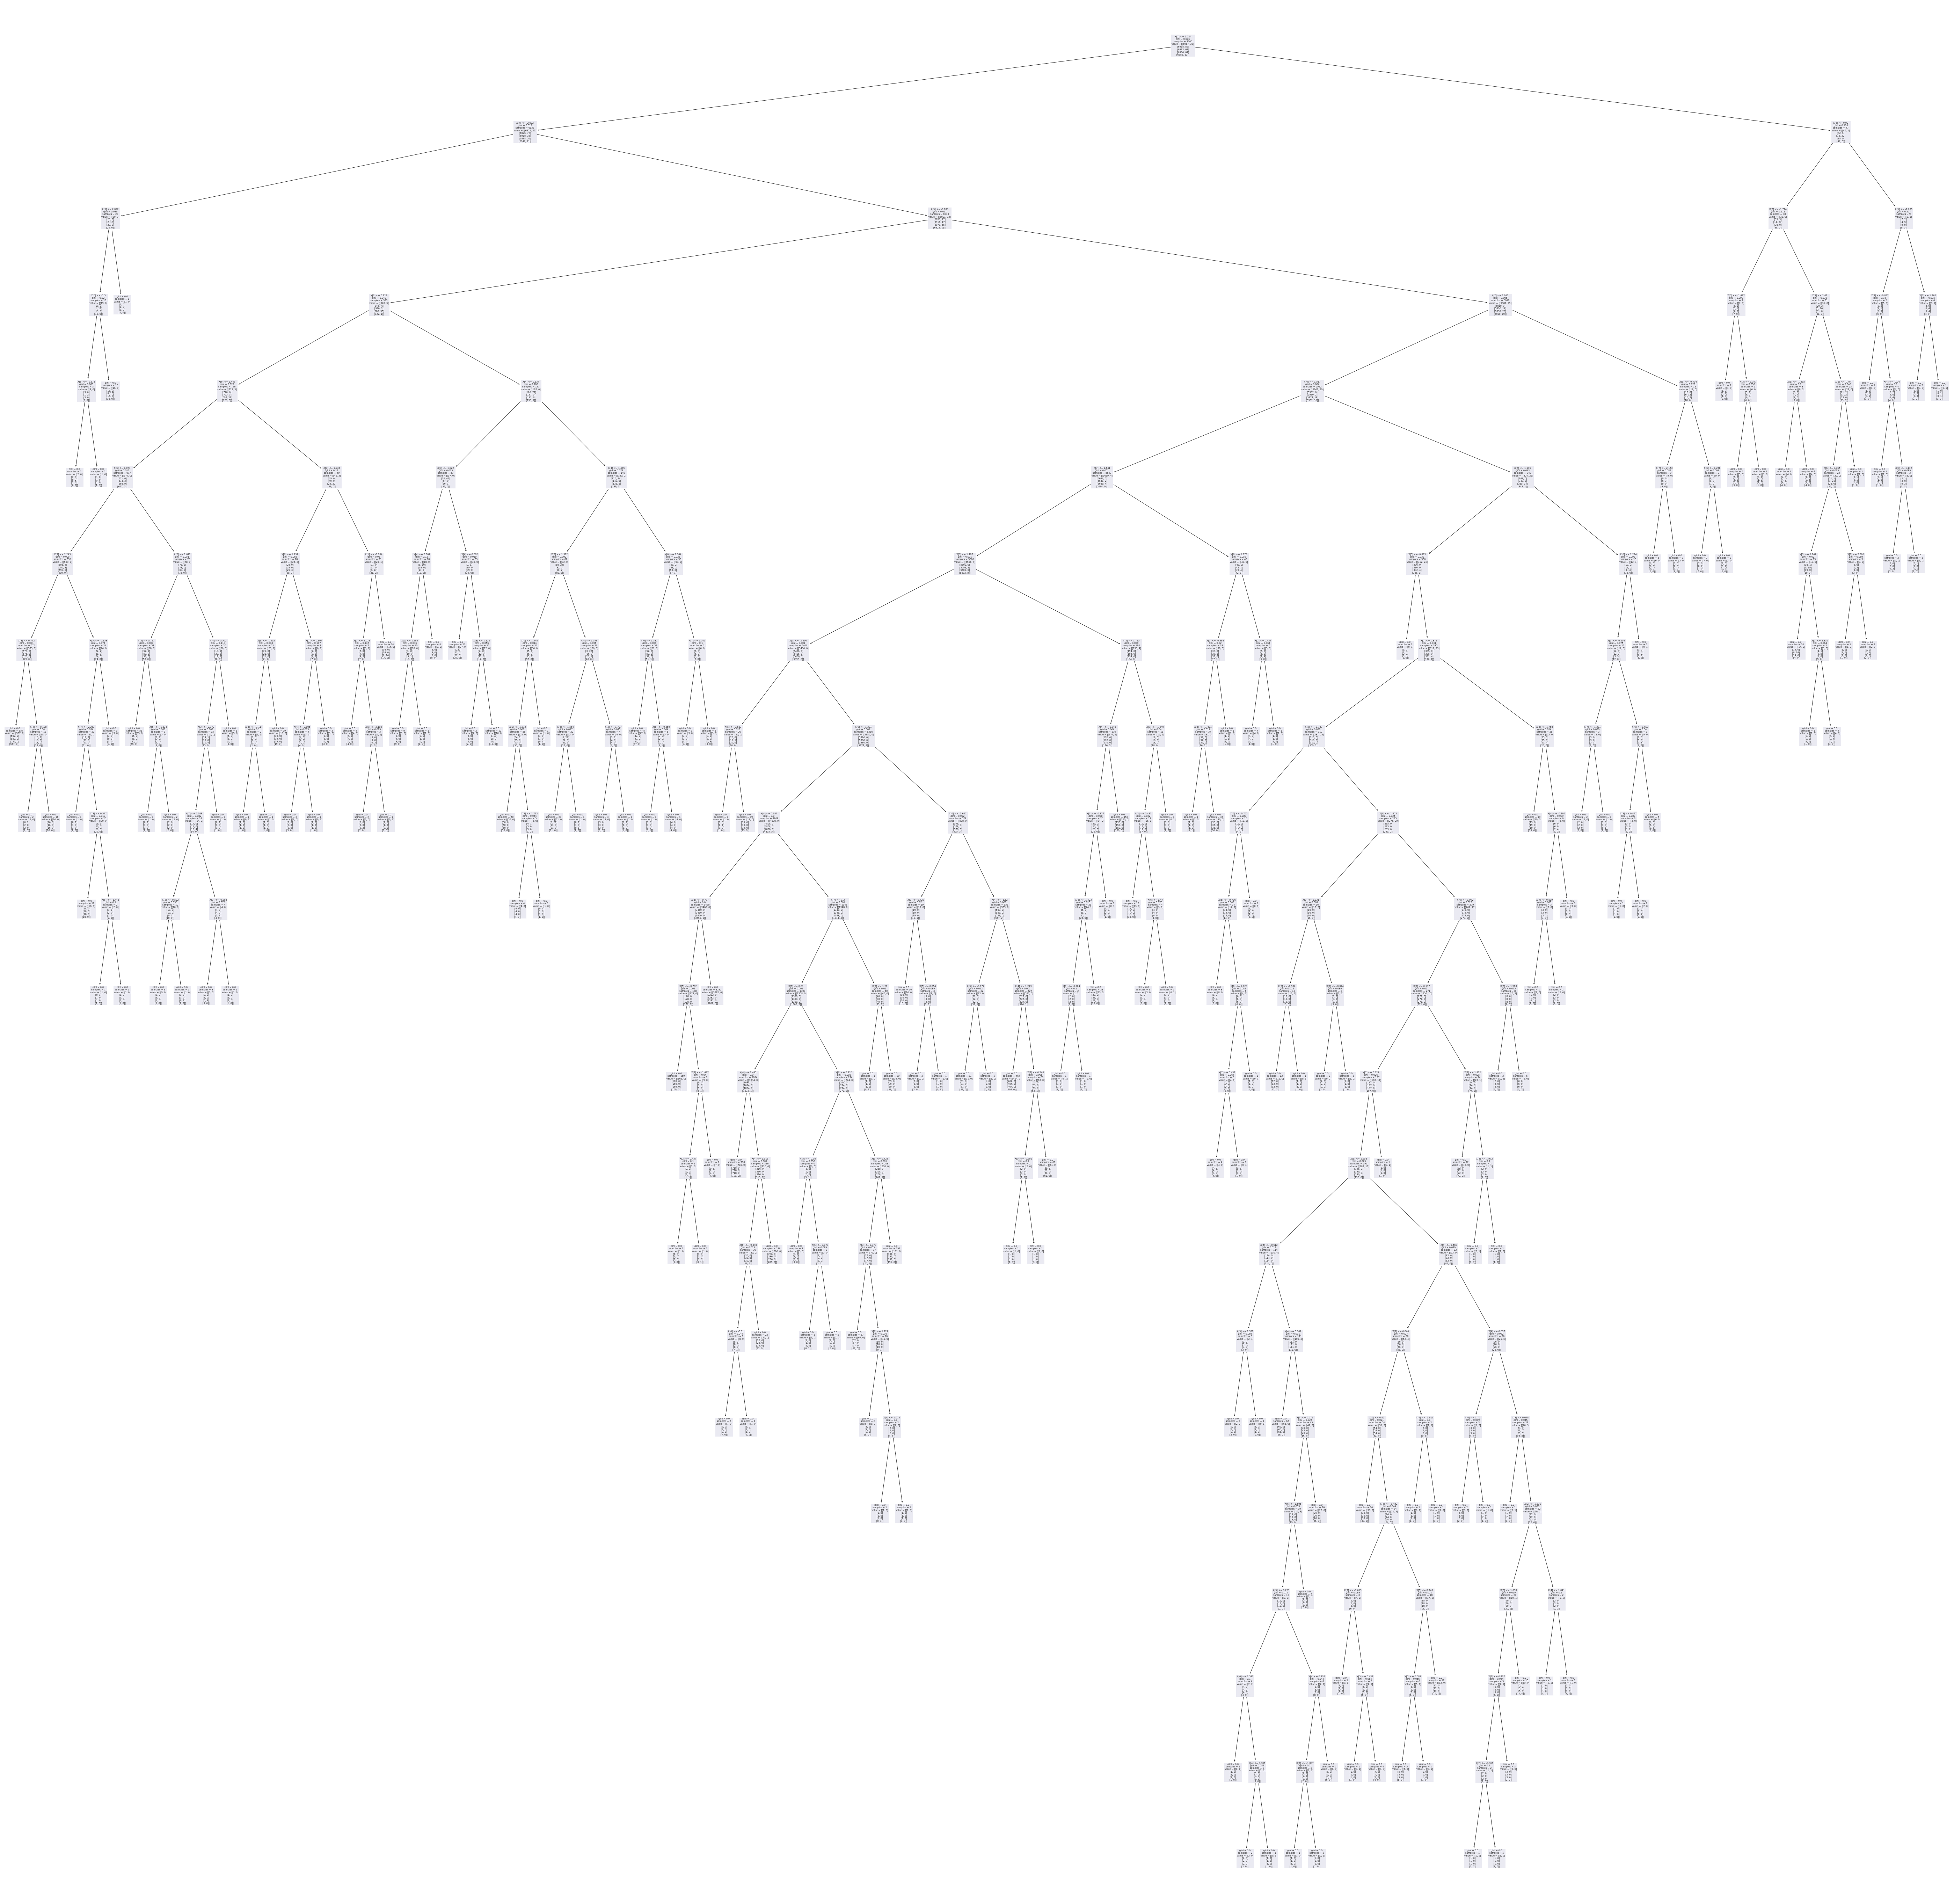

In [ ]:
fig=plt.figure(figsize=(100,100))
tree.plot_tree(karar_agaci)
plt.savefig("dec_tree")

## Lojistik Regresyon

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

target_names = ['TWF', 'HDF', 'PWF','OSF','RNF']
loj_model = OneVsRestClassifier(LogisticRegression(solver = "liblinear"))
loj_model.fit(X_train,y_train)
print("Doğruluk Skoru:",metrics.accuracy_score(y_test, loj_model.predict(X_test)))
print(metrics.classification_report(y_test,loj_model.predict(X_test),target_names=target_names))

Doğruluk Skoru: 0.9753333333333334
              precision    recall  f1-score   support

         TWF       0.00      0.00      0.00        13
         HDF       0.91      0.30      0.45        33
         PWF       0.95      0.64      0.77        28
         OSF       1.00      0.44      0.61        34
         RNF       0.00      0.00      0.00         8

   micro avg       0.96      0.37      0.53       116
   macro avg       0.57      0.28      0.37       116
weighted avg       0.78      0.37      0.49       116
 samples avg       0.01      0.01      0.01       116



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K En Yakın Komşuluk (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X_train, y_train)
print("Doğruluk Skoru:",metrics.accuracy_score(y_test, knn_model.predict(X_test)))
print(metrics.classification_report(y_test,knn_model.predict(X_test),target_names=target_names))

Doğruluk Skoru: 0.969
              precision    recall  f1-score   support

         TWF       0.00      0.00      0.00        13
         HDF       0.30      0.09      0.14        33
         PWF       1.00      0.32      0.49        28
         OSF       0.94      0.44      0.60        34
         RNF       0.00      0.00      0.00         8

   micro avg       0.77      0.23      0.36       116
   macro avg       0.45      0.17      0.25       116
weighted avg       0.60      0.23      0.33       116
 samples avg       0.01      0.01      0.01       116



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Destek Vektör Makineleri (SVM)

In [ ]:
from sklearn.svm import SVC

svm_model = OneVsRestClassifier(SVC(kernel='linear', decision_function_shape='ovr'))
svm_model.fit(X_train,y_train)
print("Doğruluk Skoru:",metrics.accuracy_score(y_test, svm_model.predict(X_test)))
print(metrics.classification_report(y_test,svm_model.predict(X_test),target_names=target_names))

Doğruluk Skoru: 0.9823333333333333
              precision    recall  f1-score   support

         TWF       0.00      0.00      0.00        13
         HDF       0.94      0.48      0.64        33
         PWF       0.95      0.75      0.84        28
         OSF       0.97      0.85      0.91        34
         RNF       0.00      0.00      0.00         8

   micro avg       0.96      0.57      0.71       116
   macro avg       0.57      0.42      0.48       116
weighted avg       0.78      0.57      0.65       116
 samples avg       0.02      0.02      0.02       116



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Sinir Ağları

In [ ]:
from sklearn.neural_network import MLPClassifier

mlpc_model = MLPClassifier().fit(X_train, y_train)
print("Doğruluk Skoru:",metrics.accuracy_score(y_test, mlpc_model.predict(X_test)))
print(metrics.classification_report(y_test,mlpc_model.predict(X_test),target_names=target_names))

Doğruluk Skoru: 0.9833333333333333
              precision    recall  f1-score   support

         TWF       0.00      0.00      0.00        13
         HDF       0.76      0.67      0.71        33
         PWF       0.92      0.82      0.87        28
         OSF       0.92      0.97      0.94        34
         RNF       0.00      0.00      0.00         8

   micro avg       0.87      0.67      0.76       116
   macro avg       0.52      0.49      0.50       116
weighted avg       0.71      0.67      0.69       116
 samples avg       0.02      0.02      0.02       116



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and be

## Rastgele Orman Sınıflandırıcısı (Random Forest Classifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
print("Doğruluk Skoru:",metrics.accuracy_score(y_test, rf_model.predict(X_test)))
print(metrics.classification_report(y_test,rf_model.predict(X_test),target_names=target_names))

Doğruluk Skoru: 0.981
              precision    recall  f1-score   support

         TWF       0.00      0.00      0.00        13
         HDF       0.94      0.52      0.67        33
         PWF       0.91      0.71      0.80        28
         OSF       1.00      0.65      0.79        34
         RNF       0.00      0.00      0.00         8

   micro avg       0.95      0.51      0.66       116
   macro avg       0.57      0.38      0.45       116
weighted avg       0.78      0.51      0.61       116
 samples avg       0.02      0.02      0.02       116



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = OneVsRestClassifier(AdaBoostClassifier(random_state=1))
model.fit(X_train, y_train)
print("Doğruluk Skoru:",model.score(X_test,y_test))
print(metrics.classification_report(y_test,model.predict(X_test),target_names=target_names))

Doğruluk Skoru: 0.985
              precision    recall  f1-score   support

         TWF       0.00      0.00      0.00        13
         HDF       0.90      0.85      0.88        33
         PWF       0.92      0.82      0.87        28
         OSF       0.94      0.91      0.93        34
         RNF       0.00      0.00      0.00         8

   micro avg       0.87      0.71      0.78       116
   macro avg       0.55      0.52      0.53       116
weighted avg       0.75      0.71      0.73       116
 samples avg       0.03      0.03      0.02       116



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = OneVsRestClassifier(GradientBoostingClassifier(learning_rate=0.01,random_state=1))
model.fit(X_train, y_train)
print("Doğruluk Skoru:",model.score(X_test,y_test))
print(metrics.classification_report(y_test,model.predict(X_test),target_names=target_names))

Doğruluk Skoru: 0.9766666666666667
              precision    recall  f1-score   support

         TWF       0.00      0.00      0.00        13
         HDF       0.85      0.33      0.48        33
         PWF       0.91      0.75      0.82        28
         OSF       0.91      0.59      0.71        34
         RNF       0.00      0.00      0.00         8

   micro avg       0.87      0.45      0.59       116
   macro avg       0.53      0.33      0.40       116
weighted avg       0.73      0.45      0.54       116
 samples avg       0.02      0.02      0.02       116



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## XG Boost

In [ ]:
import xgboost as xgb

model = OneVsRestClassifier(xgb.XGBClassifier(random_state=1,learning_rate=0.01))
model.fit(X_train, y_train)
print("Doğruluk Skoru:",model.score(X_test,y_test))
print(metrics.classification_report(y_test,model.predict(X_test),target_names=target_names))

Doğruluk Skoru: 0.9773333333333334
              precision    recall  f1-score   support

         TWF       0.00      0.00      0.00        13
         HDF       0.70      0.42      0.53        33
         PWF       0.88      0.75      0.81        28
         OSF       0.88      0.68      0.77        34
         RNF       0.00      0.00      0.00         8

   micro avg       0.82      0.50      0.62       116
   macro avg       0.49      0.37      0.42       116
weighted avg       0.67      0.50      0.57       116
 samples avg       0.02      0.02      0.02       116



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
